In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [20]:
IMAGE_SIZE = [224, 224]

train_path = 'Documents/train'
valid_path = 'Documents/val'

In [21]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [22]:
for layer in inception.layers:
    layer.trainable = False

In [23]:
folders = glob('Documents/train/*')


In [24]:
folders

['Documents/train\\diseased cotton leaf',
 'Documents/train\\diseased cotton plant',
 'Documents/train\\fresh cotton leaf',
 'Documents/train\\fresh cotton plant']

In [25]:
len(folders)

4

In [26]:
x = Flatten()(inception.output)


In [27]:
prediction = Dense(len(folders), activation='softmax')(x)


model = Model(inputs=inception.input, outputs=prediction)


In [28]:
model.summary()


Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [35]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [37]:
training_set = train_datagen.flow_from_directory('Documents/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [38]:
test_set = test_datagen.flow_from_directory('Documents/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')



Found 253 images belonging to 4 classes.


In [39]:
r= model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Epoch 1/20
61/61 [==============================] - 340s 6s/step - loss: 2.6942 - accuracy: 0.7263 - val_loss: 0.6234 - val_accuracy: 0.8735
Epoch 2/20
61/61 [==============================] - 330s 5s/step - loss: 0.5940 - accuracy: 0.8898 - val_loss: 0.4196 - val_accuracy: 0.9012
Epoch 3/20
61/61 [==============================] - 350s 6s/step - loss: 0.5389 - accuracy: 0.9077 - val_loss: 0.5755 - val_accuracy: 0.8696
Epoch 4/20
61/61 [==============================] - 347s 6s/step - loss: 0.7158 - accuracy: 0.8888 - val_loss: 0.5362 - val_accuracy: 0.9051
Epoch 5/20
61/61 [==============================] - 333s 5s/step - loss: 0.4637 - accuracy: 0.9272 - val_loss: 0.5226 - val_accuracy: 0.9091
Epoch 6/20
61/61 [==============================] - 346s 6s/step - loss: 0.4911 - accuracy: 0.9293 - val_loss: 0.4626 - val_accuracy: 0.9209
Epoch 7/20
61/61 [==============================] - 336s 6s/step - loss: 0.3747 - accuracy: 0.9380 - val_loss: 0.5622 - val_accuracy: 0.9289
Epoch 8/20
61

In [40]:
import matplotlib.pyplot as plt


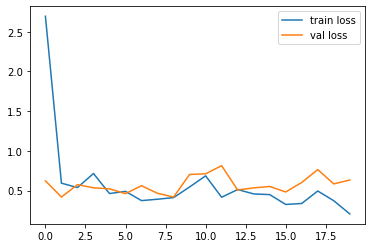

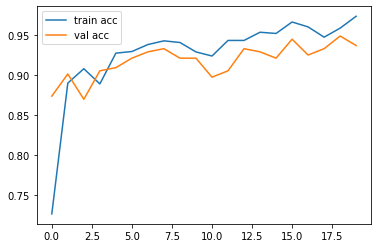

<Figure size 432x288 with 0 Axes>

In [41]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [42]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')


In [43]:
y_pred = model.predict(test_set)
y_pred

array([[8.29067943e-29, 0.00000000e+00, 1.00000000e+00, 7.90683361e-35],
       [1.52735299e-34, 1.00000000e+00, 1.47992617e-27, 1.14849265e-23],
       [1.74833342e-10, 7.90163135e-09, 1.00000000e+00, 9.27247257e-09],
       ...,
       [7.91729582e-22, 4.14660036e-07, 5.73875691e-13, 9.99999642e-01],
       [1.00000000e+00, 1.88416814e-25, 4.77019105e-21, 3.04292706e-22],
       [2.30182218e-32, 1.00000000e+00, 2.48636681e-25, 1.33992407e-17]],
      dtype=float32)

In [46]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [47]:
model=load_model('model_inception.h5')


In [48]:
img=image.load_img('Documents/cotton_fresh.jpg',target_size=(224,224))



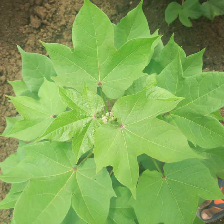

In [55]:
img

In [49]:
x=image.img_to_array(img)
x


array([[[ 69.,  61.,  38.],
        [ 73.,  65.,  42.],
        [ 68.,  60.,  37.],
        ...,
        [ 73., 102.,  54.],
        [ 79., 109.,  57.],
        [ 83., 113.,  61.]],

       [[ 73.,  65.,  42.],
        [ 72.,  64.,  41.],
        [ 73.,  65.,  42.],
        ...,
        [ 80., 109.,  61.],
        [ 81., 111.,  59.],
        [ 85., 115.,  63.]],

       [[ 75.,  67.,  44.],
        [ 71.,  63.,  40.],
        [ 77.,  69.,  46.],
        ...,
        [ 85., 114.,  66.],
        [ 83., 113.,  61.],
        [ 87., 117.,  65.]],

       ...,

       [[118., 117.,  71.],
        [140., 139.,  93.],
        [130., 129.,  83.],
        ...,
        [ 70.,  64.,  32.],
        [ 70.,  70.,  42.],
        [ 63.,  63.,  35.]],

       [[143., 135.,  88.],
        [152., 142.,  93.],
        [161., 155., 103.],
        ...,
        [ 69.,  69.,  43.],
        [ 58.,  58.,  32.],
        [ 63.,  63.,  37.]],

       [[148., 140.,  93.],
        [165., 155., 106.],
        [160., 1

In [50]:
x.shape


(224, 224, 3)

In [51]:
x=x/255


In [52]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [54]:
model.predict(img_data)


array([[9.7567868e-01, 1.7730907e-06, 1.3313554e-06, 2.4318280e-02]],
      dtype=float32)